# Explore here

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score


# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [3]:
print(df.head())
print(df.shape)
print(df.info)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)
<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0   

In [10]:
print(df.columns)
print(df.dtypes)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [26]:
print(df.isnull().sum())

print(df['region'].value_counts())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [59]:
# Test/train split
from sklearn.model_selection import train_test_split
training_df, testing_df = train_test_split(df, test_size=0.2, random_state=315)

In [60]:
df['sex'] = df['sex'].replace({'female':0, 'male':1})
df['smoker'] = df['smoker'].replace({'no':0, 'yes':1})
df['region'] = df['region'].replace({'southwest': 0, 'southeast':1, 'northwest':2, 'northeast':3})

training_df['sex'] = training_df['sex'].replace({'female':0, 'male':1})
training_df['smoker'] = training_df['smoker'].replace({'no':0, 'yes':1})
training_df['region'] = training_df['region'].replace({'southwest': 0, 'southeast':1, 'northwest':2, 'northeast':3})

testing_df['sex'] = testing_df['sex'].replace({'female':0, 'male':1})
testing_df['smoker'] = testing_df['smoker'].replace({'no':0, 'yes':1})
testing_df['region'] = testing_df['region'].replace({'southwest': 0, 'southeast':1, 'northwest':2, 'northeast':3})

print(df.head())
print(training_df.head())
print(testing_df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520
      age  sex     bmi  children  smoker  region      charges
450    39    1  29.600         4       0       0   7512.26700
1333   50    1  30.970         3       0       2  10600.54830
1296   18    1  26.125         0       0       3   1708.92575
15     19    1  24.600         1       0       0   1837.23700
401    47    1  47.520         1       0       1   8083.91980
      age  sex     bmi  children  smoker  region      charges
1086   55    1  28.975         0       0       3  10796.35025
1235   26    1  31.065         0       0       2   2699.56835
1120   23    0  31.400         0       1       0  34166.27300
157    18    1  25.175    

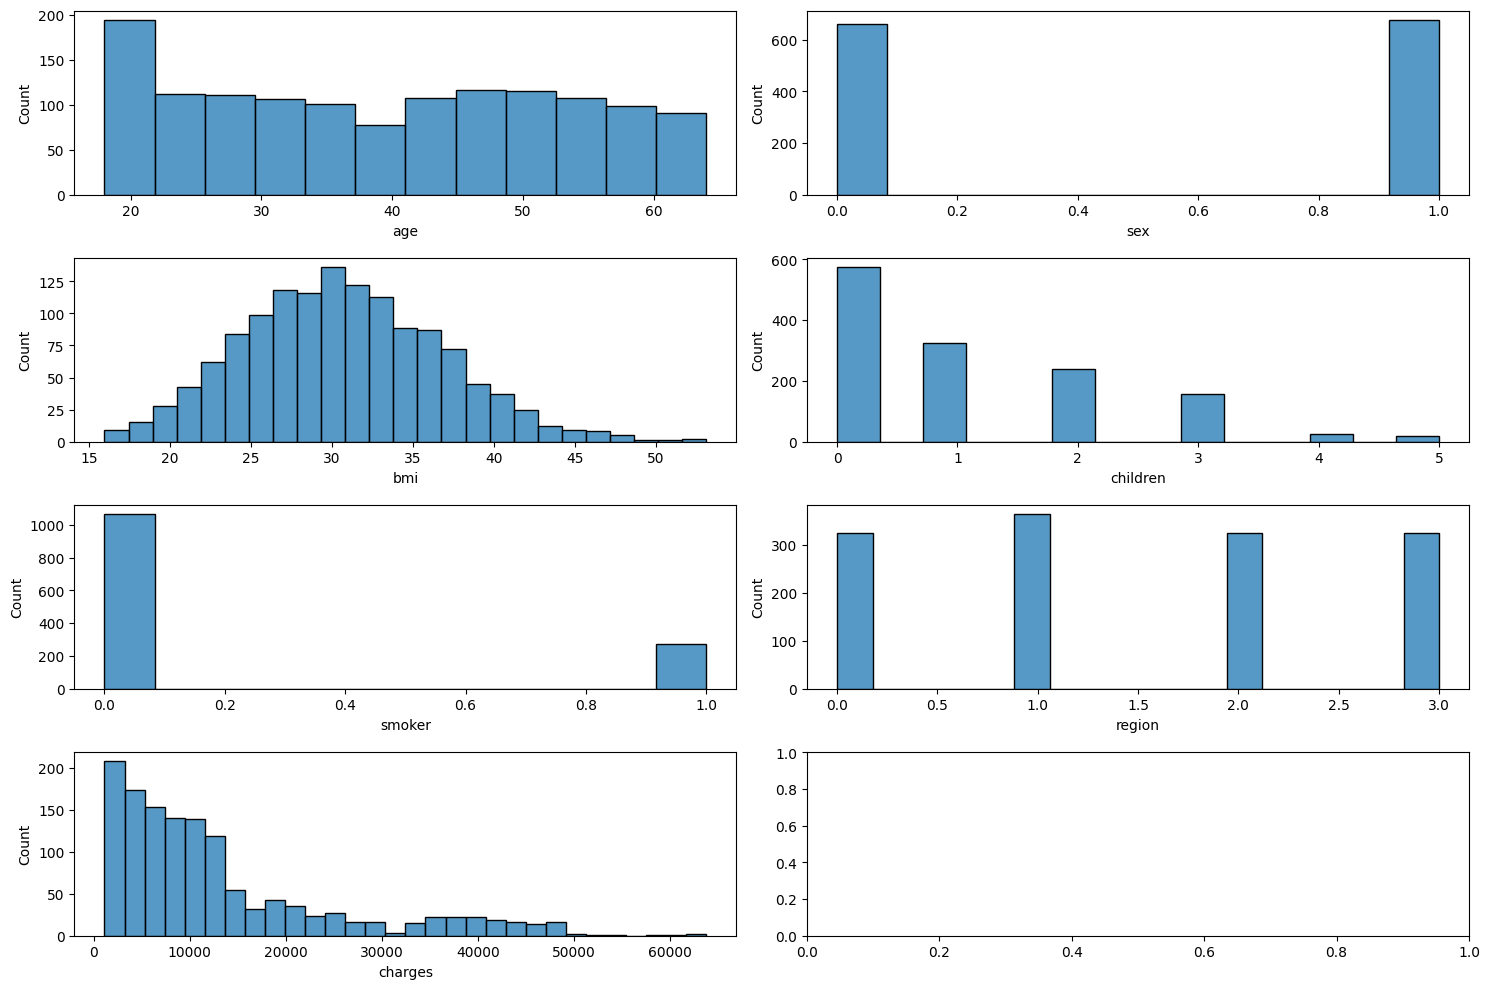

In [61]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], data=df, x='age')
sns.histplot(ax=axes[0, 1], data=df, x='sex')
sns.histplot(ax=axes[1, 0], data=df, x='bmi')
sns.histplot(ax=axes[1, 1], data=df, x='children')
sns.histplot(ax=axes[2, 0], data=df, x='smoker')
sns.histplot(ax=axes[2, 1], data=df, x='region')
sns.histplot(ax=axes[3, 0], data=df, x='charges')

plt.tight_layout()
plt.show()


In [49]:
#Consider removing region column later- seems pretty evenly distributed

<Axes: >

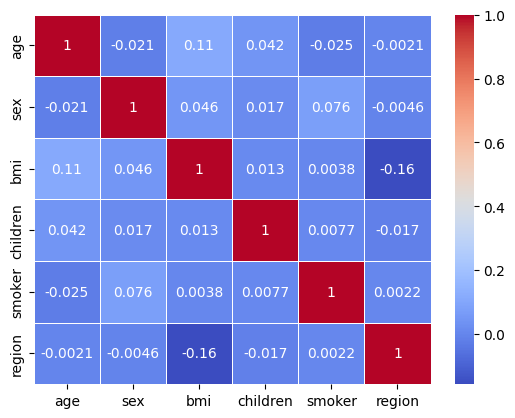

In [62]:
sns.heatmap(df.drop(['charges'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [63]:
#Test/train split
from sklearn.model_selection import train_test_split
training_df, testing_df = train_test_split(df, test_size=0.2, random_state=315)



In [69]:
X_train = training_df.drop(['charges'], axis=1)
y_train = training_df['charges']

print(X_train.isna().value_counts())
print(y_train.isna().value_counts())

age    sex    bmi    children  smoker  region
False  False  False  False     False   False     1070
Name: count, dtype: int64
charges
False    1070
Name: count, dtype: int64


In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

y_test = testing_df['charges']
X_test = testing_df.drop(['charges'], axis=1)

In [71]:
print(f"Intercept (a): {model.intercept_}") 
print(f"Coefficients (b): {model.coef_}")   

Intercept (a): -12625.609112843482
Coefficients (b): [  255.80919512  -110.1882098    321.1492153    500.34591985
 23861.57945146   335.43876015]


In [78]:
y_pred = model.predict(X_test)
y_pred 

array([11645.32320273,  4562.61964401, 27203.66718674, 24821.59541654,
       14023.63844249, 16578.78326086,  1996.59156238, 29714.6905941 ,
       10242.44218488,  2552.28009974,  9247.90353328,   425.5078221 ,
        1689.27311494, 36565.34680917,  5870.48717351, 11184.53950505,
       12538.10299487, 14597.72509856, 10107.32196612,  5013.21968335,
        1112.47090742, 10924.83878335, 14771.92699692, 10608.06070665,
       10716.62830229, 40266.38803832,  6311.05845511,  9912.49176747,
        8993.29077657,  6743.79814915, 38581.99265195,  8066.85753767,
        8031.12648995, 14207.49513129,  9127.02412453, 11351.83512699,
       10100.9783456 ,  6563.48781223, 33930.82825568, 13269.22391142,
       39951.19848623, 14766.65549703, 10285.41625507, 14531.83098065,
        8963.34853451, 10472.96875045, 35106.64316129,  5756.10863925,
        5279.35191876, 34858.36570476, 29591.78179356,  6947.35409186,
        5730.76732262, 12490.80920829, 28463.13075255,  8041.33682973,
      

In [79]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 37790730.49050331
Coefficient of determination: 0.7423055385294913


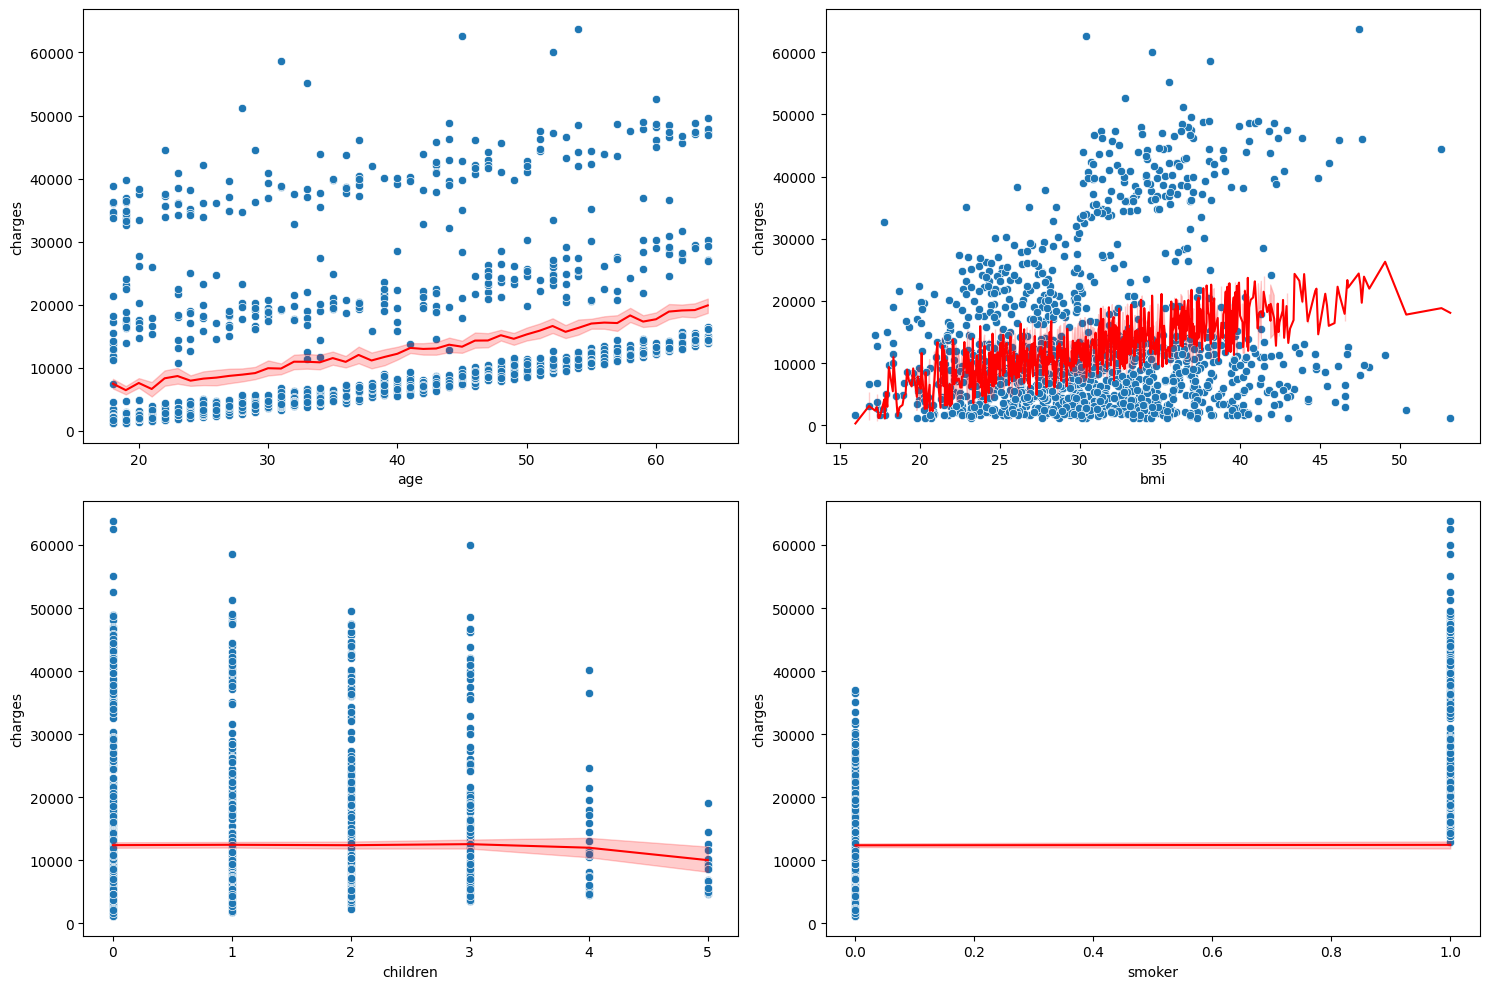

In [81]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
df_2 = pd.concat([X_test, y_test], axis=1)

regression_equation = lambda x: -12229.443851012464 + 253.96892166 * x['age'] + 322.073366 * x['sex'] + 478.682 * x['bmi'] - 238.5 * x['children'] + 238.5 * x['smoker']

sns.scatterplot(ax=axis[0, 0], data=df, x='age', y='charges')
sns.lineplot(ax=axis[0, 0], x=df['age'], y=regression_equation(df), color='red')
sns.scatterplot(ax=axis[0, 1], data=df, x='bmi', y='charges')
sns.lineplot(ax=axis[0, 1], x=df['bmi'], y=regression_equation(df), color='red')
sns.scatterplot(ax=axis[1, 0], data=df, x='children', y='charges')
sns.lineplot(ax=axis[1, 0], x=df['children'], y=regression_equation(df), color='red')
sns.scatterplot(ax=axis[1, 1], data=df, x='smoker', y='charges')
sns.lineplot(ax=axis[1, 1], x=df['smoker'], y=regression_equation(df), color='red')


plt.tight_layout()

plt.show()
                                                              

In [87]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Root mean squared error: {root_mean_squared_error(y_test, y_pred)}")

Mean squared error: 37790730.49050331
Coefficient of determination: 0.7423055385294913
Root mean squared error: 6147.416570438619
